In [94]:
import sys
sys.path.append(r'./src/')

from imbalancedXGBoost import ImbalancedXGBoost
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import data
import xgboost as xgb
import pandas as pd

In [95]:
heart_acc = []
sonar_acc = []
diabetes_acc = []
pd_acc = []

## Heart Rate ##

In [96]:
X_heart, y_heart = data.get_heart_failure()
X_train_heart, y_train_heart, X_test_heart, y_test_heart = data.cv_split(X=X_heart, y=y_heart, folds=5, stratified=True)[0]

In [97]:
model = xgb.XGBClassifier(n_estimators=10)

model.fit(X_train_heart, y_train_heart)

predictions = model.predict(X_test_heart)

accuracy = accuracy_score(y_test_heart, predictions)

print(f'Basic Model Accuracy: \t{accuracy*100:.2f}%')

heart_acc.append(accuracy)

Basic Model Accuracy: 	82.26%


In [98]:
n_estimators = 10
max_depth = 10 
max_leaves = 0
eta_learning_rate = 0.1 
verbosity = 1
objective = 'binary:logistic' 
booster = 'gbtree'
gamma = 0.0
min_child_weight = 1.0
early_stopping_rounds = None
eval_metric = 'logloss'
l1_reg_alpha = 0.0
l2_reg_lambda = 1.0
focal_gamma = None
weighted_alpha = None

In [99]:
base_xgb_model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

base_xgb_model.fit(X_train_heart, y_train_heart)
predictions = base_xgb_model.predict(X_test_heart, y_test_heart)
base_accuracy = accuracy_score(y_test_heart, predictions)
print(f'Basic Model Accuracy: \t{base_accuracy*100:.2f}%')

heart_acc.append(base_accuracy)

Basic Model Accuracy: 	82.26%


In [100]:
objective = 'weighted' 
weighted_alpha = 0.4
weighted_xgb_model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

weighted_xgb_model.fit(X_train_heart, y_train_heart)
predictions = weighted_xgb_model.predict(X_test_heart, y_test_heart)
weighted_accuracy = accuracy_score(y_test_heart, predictions)
print(f'Weigted Accuracy: \t{weighted_accuracy*100:.2f}%')

heart_acc.append(weighted_accuracy)

Weigted Accuracy: 	42.47%


In [101]:
objective = 'focal' 
focal_gamma = 1.5
focal_xgb_model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

focal_xgb_model.fit(X_train_heart, y_train_heart)
predictions = focal_xgb_model.predict(X_test_heart, y_test_heart)
focal_accuracy = accuracy_score(y_test_heart, predictions)
print(f'Focal Accuracy: \t{focal_accuracy*100:.2f}%')

heart_acc.append(focal_accuracy)

Focal Accuracy: 	83.33%


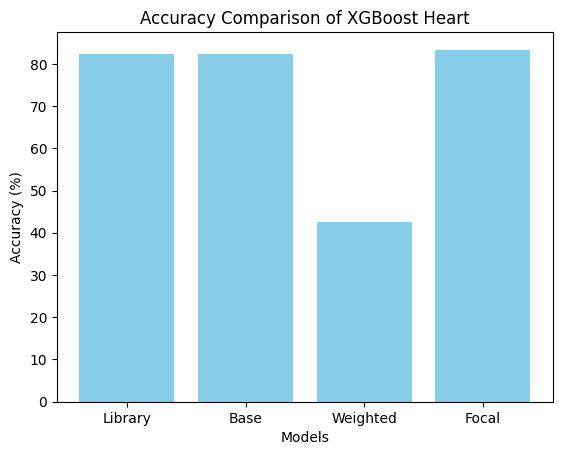

In [102]:

labels = ['Library', 'Base', 'Weighted', 'Focal']

heart_acc = [x * 100 for x in heart_acc]

x = range(len(heart_acc))

plt.bar(x, heart_acc, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of XGBoost Heart')

plt.xticks(x, labels)
plt.show()


## Sonar Mine ##

In [103]:
X_sonar, y_sonar = data.get_sonar_mines()
X_train_sonar, y_train_sonar, X_test_sonar, y_test_sonar = data.cv_split(X=X_sonar, y=y_sonar, folds=5, stratified=True)[0]

/Users/alexnemecek/Desktop/Machine Learning/csds440project-f23-4/ajn98-boosting/data.py:55: Warning: If there are no headers in the file, then this function assumes that the labels are in the final column and everything before is data. Please verify that your dataset takes this form before moving forward.
  warnings.warn("If there are no headers in the file, then this function assumes that the labels are in the final column and everything before is data. Please verify that your dataset takes this form before moving forward.", Warning)


In [104]:
model = xgb.XGBClassifier(n_estimators=10)

model.fit(X_train_sonar, y_train_sonar)

predictions = model.predict(X_test_sonar)

accuracy = accuracy_score(y_test_sonar, predictions)

print(f'Basic Model Accuracy: \t{accuracy*100:.2f}%')

sonar_acc.append(accuracy)

Basic Model Accuracy: 	70.45%


In [105]:
n_estimators = 10
max_depth = 10 
max_leaves = 0
eta_learning_rate = 0.1 
verbosity = 1
objective = 'binary:logistic' 
booster = 'gbtree'
gamma = 0.0
min_child_weight = 1.0
early_stopping_rounds = None
eval_metric = 'logloss'
l1_reg_alpha = 0.0
l2_reg_lambda = 1.0
focal_gamma = None
weighted_alpha = None

In [106]:
base_xgb_model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

base_xgb_model.fit(X_train_sonar, y_train_sonar)
predictions = base_xgb_model.predict(X_test_sonar, y_test_sonar)
base_accuracy = accuracy_score(y_test_sonar, predictions)
print(f'Basic Model Accuracy: \t{base_accuracy*100:.2f}%')

sonar_acc.append(base_accuracy)

Basic Model Accuracy: 	61.36%


In [107]:
objective = 'weighted' 
weighted_alpha = 0.4
weighted_xgb_model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

weighted_xgb_model.fit(X_train_sonar, y_train_sonar)
predictions = weighted_xgb_model.predict(X_test_sonar, y_test_sonar)
weighted_accuracy = accuracy_score(y_test_sonar, predictions)
print(f'Weigted Accuracy: \t{weighted_accuracy*100:.2f}%')

sonar_acc.append(weighted_accuracy)

Weigted Accuracy: 	40.91%


In [108]:
objective = 'focal' 
focal_gamma = 1.5
focal_xgb_model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

focal_xgb_model.fit(X_train_sonar, y_train_sonar)
predictions = focal_xgb_model.predict(X_test_sonar, y_test_sonar)
focal_accuracy = accuracy_score(y_test_sonar, predictions)
print(f'Focal Accuracy: \t{focal_accuracy*100:.2f}%')

sonar_acc.append(focal_accuracy)

Focal Accuracy: 	59.09%


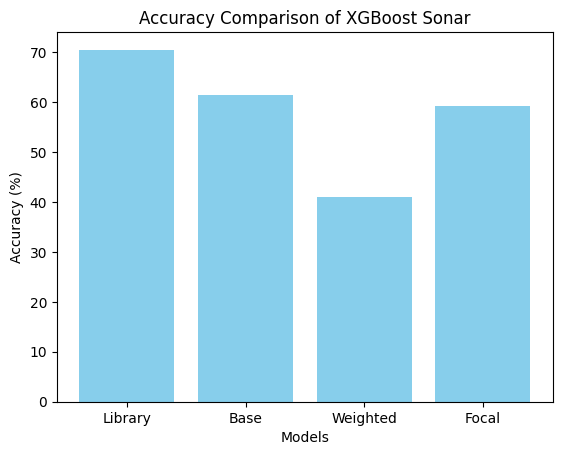

In [109]:
# labels = ['Base', 'Weighted', 'Focal']
sonar_acc = [x * 100 for x in sonar_acc]

x = range(len(sonar_acc))

plt.bar(x, sonar_acc, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of XGBoost Sonar')

plt.xticks(x, labels)
plt.show()

## Pima Diabetes ##

In [110]:
X_diabetes, y_diabetes = data.get_pima_diabetes()
X_train_diabetes, y_train_diabetes, X_test_diabetes, y_test_diabetes = data.cv_split(X=X_diabetes, y=y_diabetes, folds=5, stratified=True)[0]

In [111]:
model = xgb.XGBClassifier(n_estimators=10)

model.fit(X_train_diabetes, y_train_diabetes)

predictions = model.predict(X_test_diabetes)

accuracy = accuracy_score(y_test_diabetes, predictions)

print(f'Basic Model Accuracy: \t{accuracy*100:.2f}%')

diabetes_acc.append(accuracy)

Basic Model Accuracy: 	77.56%


In [112]:
n_estimators = 10
max_depth = 10 
max_leaves = 0
eta_learning_rate = 0.1 
verbosity = 1
objective = 'binary:logistic' 
booster = 'gbtree'
gamma = 0.0
min_child_weight = 1.0
early_stopping_rounds = None
eval_metric = 'logloss'
l1_reg_alpha = 0.0
l2_reg_lambda = 1.0
focal_gamma = None
weighted_alpha = None

In [113]:
base_xgb_model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

base_xgb_model.fit(X_train_diabetes, y_train_diabetes)
predictions = base_xgb_model.predict(X_test_diabetes, y_test_diabetes)
base_accuracy = accuracy_score(y_test_diabetes, predictions)
print(f'Basic Model Accuracy: \t{base_accuracy*100:.2f}%')

diabetes_acc.append(base_accuracy)

Basic Model Accuracy: 	71.79%


In [114]:
objective = 'weighted' 
weighted_alpha = 0.4
weighted_xgb_model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

weighted_xgb_model.fit(X_train_diabetes, y_train_diabetes)
predictions = weighted_xgb_model.predict(X_test_diabetes, y_test_diabetes)
weighted_accuracy = accuracy_score(y_test_diabetes, predictions)
print(f'Weigted Accuracy: \t{weighted_accuracy*100:.2f}%')

diabetes_acc.append(weighted_accuracy)

Weigted Accuracy: 	21.15%


In [115]:
objective = 'focal' 
focal_gamma = 1.5
focal_xgb_model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

focal_xgb_model.fit(X_train_diabetes, y_train_diabetes)
predictions = focal_xgb_model.predict(X_test_diabetes, y_test_diabetes)
focal_accuracy = accuracy_score(y_test_diabetes, predictions)
print(f'Focal Accuracy: \t{focal_accuracy*100:.2f}%')

diabetes_acc.append(focal_accuracy)

Focal Accuracy: 	75.64%


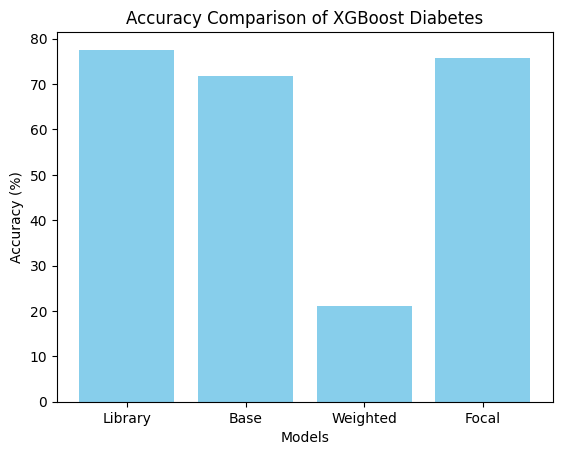

In [116]:
labels = ['Library','Base', 'Weighted', 'Focal']
diabetes_acc = [x * 100 for x in diabetes_acc]

x = range(len(diabetes_acc))

plt.bar(x, diabetes_acc, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of XGBoost Diabetes')

plt.xticks(x, labels)
plt.show()

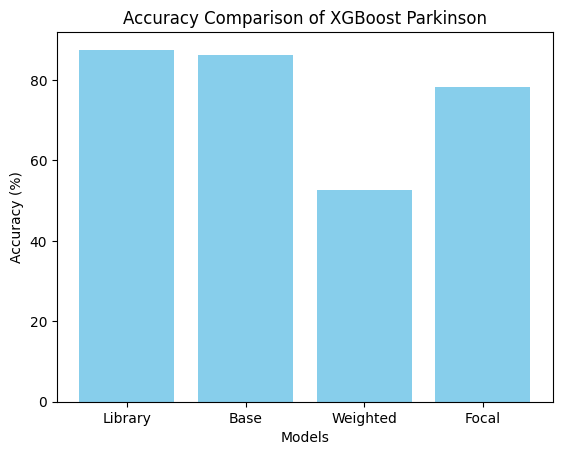

In [118]:
labels = ['Library','Base', 'Weighted', 'Focal']
acc = [87.50, 86.18, 52.63, 78.29]
x = range(len(acc))

plt.bar(x, acc, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of XGBoost Parkinson')

plt.xticks(x, labels)
plt.show()